In [15]:
import pandas as pd 
import numpy as np 
import os 
import requests
import time 
import logging
import matplotlib.pylab as plt 
import matplotlib



plt.style.use('seaborn-whitegrid')


#===
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 20),
          'font.family': 'serif',
          'font.sans-serif':'DejaVu Sans',
         'axes.titlesize':'30', 
#         'axes.labelize':'100',
        'axes.labelsize': 'medium',
          'grid.alpha': '.5',
         'xtick.labelsize':12,
         'ytick.labelsize':12
         }

plt.rcParams.update(params)
TOKEN_CRYPTO = os.environ.get("TOKEN_CRYPTO")

SYMBOL ='XRP'

In [22]:
def download_price(from_symbol, to_symbol, exchange='Bitstamp', datetime_interval='day',save=True):
    
    base_url = 'https://min-api.cryptocompare.com/data/v2/histo'
    
    url = base_url+ datetime_interval
    
    params = {'fsym': from_symbol,
              'tsym': to_symbol,
#               'limit': 2000, 
              'allData':'true',
              'aggregate': 1,
              "api_key": TOKEN_CRYPTO,
              'e': exchange}
    
    request = requests.get(url, params=params)
    data = request.json()
    if save:
        filename = '{symbol}_price_{date}.csv'.format(symbol=from_symbol,date=time.strftime('%Y%m%d'))
        df = pd.DataFrame(data['Data']['Data'])
        df['date'] = df['time'].apply(to_date)
        df.to_csv(filename,index=False)
        logging.info('file saved in {}'.format(filename))
    return data

def to_date(x):
    '''
    '''
       
    x = pd.Timestamp(x,unit='s').date()
    return x

In [24]:
#XRP
#BTC
#Algo
datum = download_price(from_symbol='Algo',to_symbol='USD',datetime_interval='day')

,time,close,high,low,open,volumefrom,volumeto,conversionType,conversionSymbol
0,1484611200,0.00683,0.00710,0.00668,0.00710,4509598.64,30673.69,force_direct,NaN
1,1484697600,0.00680,0.00719,0.00664,0.00687,5535202.45,38018.93,force_direct,NaN
2,1484784000,0.00684,0.00688,0.00650,0.00676,2951225.69,19882.33,force_direct,NaN


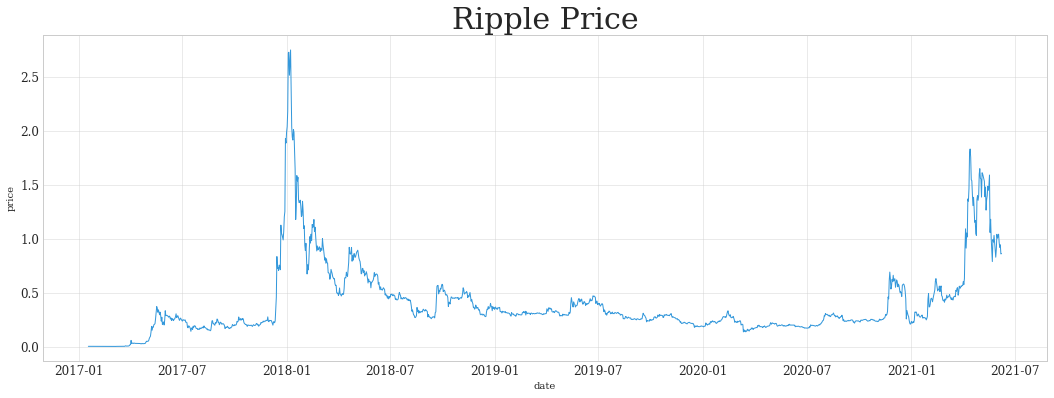

In [18]:
data = pd.read_csv("data/XRP_price_20210608.csv")
display(data.head(3))
data['date'] = data['time'].apply(to_date)
# data.to_csv('data/XRP_price_20210524.csv')

fig,ax = plt.subplots(nrows=1,figsize=(18,6))

# data = data[data["date"] > pd.Timestamp("2021-05-01")]


x_lab =  data['date'].values
y_price = data['close'].values
ax.plot(x_lab,y_price,color='#3498db',lw=1.0)
ax.set_ylabel('price')
ax.set_xlabel('date')
ax.grid(True)
plt.title('Ripple Price')
plt.savefig('plots/ripple_price.png')
plt.savefig('../../fouyapen/assets/plots/ripple/ripple_price.png')
plt.show()